In [56]:
import pandas as pd
a=pd.read_csv("/content/Wine.csv")
print(a)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [57]:
x=a.drop('Customer_Segment',axis=1)
print(x)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [58]:
y=a['Customer_Segment']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
print(pd.DataFrame(x_scaled, columns=x.columns))

      Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    0.842105    0.191700  0.572193      0.257732   0.619565       0.627586   
1    0.571053    0.205534  0.417112      0.030928   0.326087       0.575862   
2    0.560526    0.320158  0.700535      0.412371   0.336957       0.627586   
3    0.878947    0.239130  0.609626      0.319588   0.467391       0.989655   
4    0.581579    0.365613  0.807487      0.536082   0.521739       0.627586   
..        ...         ...       ...           ...        ...            ...   
173  0.705263    0.970356  0.582888      0.510309   0.271739       0.241379   
174  0.623684    0.626482  0.598930      0.639175   0.347826       0.282759   
175  0.589474    0.699605  0.481283      0.484536   0.543478       0.210345   
176  0.563158    0.365613  0.540107      0.484536   0.543478       0.231034   
177  0.815789    0.664032  0.737968      0.716495   0.282609       0.368966   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyan

In [60]:
features=x_scaled
print(features)
target=y
print(target)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]
0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64


Explained Variance Ratio: [0.36198848 0.1920749 ]


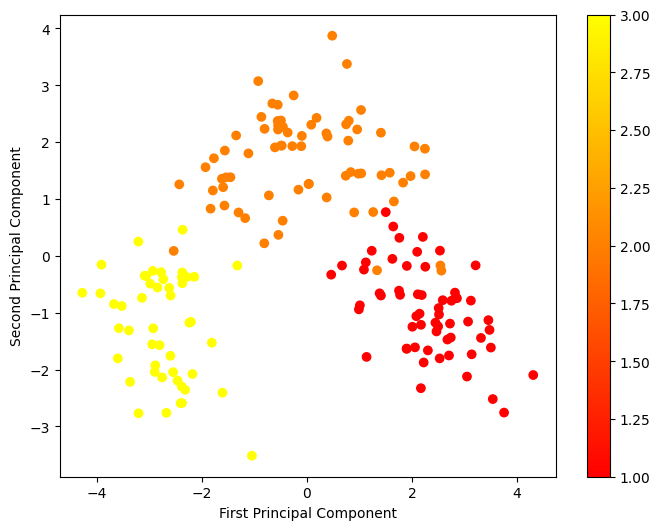

In [61]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='autumn')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

In [62]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
svm_original = SVC()
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy before PCA: {accuracy_original:.2f}")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_pca:.2f}")

Accuracy before PCA: 0.69
Accuracy after PCA: 0.96


In [63]:
import pandas as pd
a=pd.read_csv("/content/breast_cancer_survival (1) (1).csv")
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [64]:
x=a.drop('Patient_Status',axis=1)
print(x)


     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [65]:
y=a['Patient_Status']
print(y)

0      Alive
1       Dead
2      Alive
3      Alive
4      Alive
       ...  
329    Alive
330    Alive
331     Dead
332    Alive
333     Dead
Name: Patient_Status, Length: 334, dtype: object


In [66]:
x1=a.drop('HER2 status',axis=1)
x2=x1.drop('Patient_Status',axis=1)
x3=x2.drop('Surgery_type',axis=1)
x4=x3.drop('Date_of_Surgery',axis=1)
x5=x4.drop('Date_of_Last_Visit',axis=1)
x6=x5.drop('Histology',axis=1)
x7=x6.drop('PR status',axis=1)
x8=x7.drop('ER status',axis=1)
print(x8)
x=x8

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II
..   ...     ...       ...       ...       ...       ...          ...
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II

[334 rows x 7 columns]


In [67]:
x['Tumour_Stage'] = x['Tumour_Stage'].replace("I",1)
x.to_csv("updated_breast_cancer_survival.csv", index=False)
x['Tumour_Stage'] = x['Tumour_Stage'].replace("II",2)
x.to_csv("updated_breast_cancer_survival.csv", index=False)
x['Tumour_Stage'] = x['Tumour_Stage'].replace("III",3)
x.to_csv("updated_breast_cancer_survival.csv", index=False)
x['Gender'] = x['Gender'].map({'FEMALE': 1, 'MALE': 0})
x.to_csv("updated_breast_cancer_survival.csv", index=False)
print("FEATURES:\n\n")
print(x)

FEATURES:


     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage
0     42       1  0.952560   2.15000  0.007972 -0.048340             2
1     54       1  0.000000   1.38020 -0.498030 -0.507320             2
2     63       1 -0.523030   1.76400 -0.370190  0.010815             2
3     78       1 -0.876180   0.12943 -0.370380  0.132190             1
4     42       1  0.226110   1.74910 -0.543970 -0.390210             2
..   ...     ...       ...       ...       ...       ...           ...
329   59       1  0.024598   1.40050  0.024751  0.280320             2
330   41       1  0.100120  -0.46547  0.472370 -0.523870             1
331   54       1  0.753820   1.64250 -0.332850  0.857860             2
332   74       1  0.972510   1.42680 -0.366570 -0.107820             2
333   66       1  0.286380   1.39980  0.318830  0.836050             2

[334 rows x 7 columns]


In [68]:
y0=a['Patient_Status']
print(y0)
y = y0.replace({"Alive": 1, "Dead": 0})
y = y.fillna(0)
y.to_csv("updated_breast_cancer_survival.csv", index=False)
print("TARGET VARIABLE:")
print(y)

0      Alive
1       Dead
2      Alive
3      Alive
4      Alive
       ...  
329    Alive
330    Alive
331     Dead
332    Alive
333     Dead
Name: Patient_Status, Length: 334, dtype: object
TARGET VARIABLE:
0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
329    1.0
330    1.0
331    0.0
332    1.0
333    0.0
Name: Patient_Status, Length: 334, dtype: float64


In [94]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", accuracy)

Logistic Regression Accuracy: 0.75
SVM Accuracy: 0.4444444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fi

1.0
0.0
1.0
0.0
1.0
0.3333333333333333
1.0
0.25
0.8
0.4
0.6666666666666666
0.5
0.7142857142857143
0.42857142857142855
0.75
0.375
0.7777777777777778
0.4444444444444444
0.8
0.5
0.7272727272727273
0.45454545454545453
0.75
0.4166666666666667
0.7692307692307693
0.38461538461538464
0.7857142857142857
0.42857142857142855
0.8
0.4
0.8125
0.4375
0.7647058823529411
0.4117647058823529
0.7777777777777778
0.3888888888888889
0.7368421052631579
0.42105263157894735
0.75
0.4
0.7619047619047619
0.42857142857142855
0.7272727272727273
0.4090909090909091
0.7391304347826086
0.391304347826087
0.75
0.4166666666666667
0.76
0.44
0.7692307692307693
0.46153846153846156
0.7777777777777778
0.48148148148148145
0.7857142857142857
0.5
0.7586206896551724
0.5172413793103449
0.7666666666666667
0.5
0.7741935483870968
0.4838709677419355
0.78125
0.46875
0.7575757575757576
0.48484848484848486
0.7647058823529411
0.47058823529411764
0.7428571428571429
0.45714285714285713
0.75
0.4444444444444444
0.75
0.4444444444444444
0.75
0.44

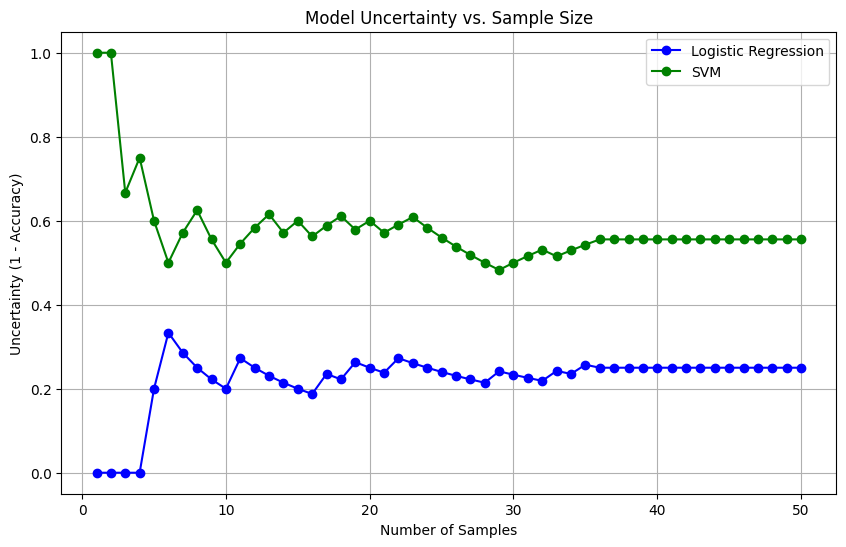

In [93]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming 'logistic_model' and 'svm_model' are already fitted to your data
uncertainty_logistic = []
uncertainty_svm = []
subset_sizes = range(1, 51)

for subset_size in subset_sizes:
    # Get the first 'subset_size' samples from your test data
    subset_X_test = X_test[:subset_size]
    subset_y_test = y_test[:subset_size]

    # Make predictions for the current subset
    logistic_predictions = logistic_model.predict(subset_X_test)
    svm_predictions = svm_model.predict(subset_X_test)

    # Calculate accuracy for the current subset
    logistic_accuracy = accuracy_score(subset_y_test, logistic_predictions)
    svm_accuracy = accuracy_score(subset_y_test, svm_predictions)

    uncertainty_logistic.append(1 - logistic_accuracy)
    uncertainty_svm.append(1 - svm_accuracy)
    print(logistic_accuracy)
    print(svm_accuracy)
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, uncertainty_logistic, label='Logistic Regression', marker='o', linestyle='-', color='b')
plt.plot(subset_sizes, uncertainty_svm, label='SVM', marker='o', linestyle='-', color='g')

plt.title('Model Uncertainty vs. Sample Size')
plt.xlabel('Number of Samples')
plt.ylabel('Uncertainty (1 - Accuracy)')
plt.legend()
plt.grid(True)
plt.show()